In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = "/content/drive/MyDrive/animals/animals"
animals = os.listdir(dataset_path)
print(animals)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['panda', 'dogs', 'cats']


Load the dataset form google drive

Selecting 1000 images from each class for balanced dataset.

In [10]:
selected_images = {}
for animal in animals:
  animal_path = os.path.join(dataset_path, animal)
  images = os.listdir(animal_path)
  if len(images) >= 3000:
    selected_images[animal] = random.sample(images, 3000)
  else:
    print(f"Class {animal} has less than 3000 images. Selecting all {len(images)} images.")
    selected_images[animal] = images

Class panda has less than 3000 images. Selecting all 100 images.
Class dogs has less than 3000 images. Selecting all 100 images.
Class cats has less than 3000 images. Selecting all 100 images.


Initiating image properties and train_data size.

In [11]:
image_size = 64
images_count = 100
k_values = list(range(2, 20))

# **Euclidean_distance**

In [12]:
def euclidean_distance(x1, x2):
    """
    Compute the Euclidean distance between two points.
    """
    return np.sqrt(np.sum((x1 - x2) ** 2))

## **K-NN Algorithm**

In [13]:
def knn_classifier(train_data, train_labels, test_data, k):
    """
    Classify a single test instance using k-Nearest Neighbors.
    """
    distances = [euclidean_distance(test_data, train_data[i]) for i in range(len(train_data))]
    k_nearest_indices = np.argsort(distances)[:k]
    k_nearest_labels = [train_labels[i] for i in k_nearest_indices]

    # Find the most common label
    label_counts = {}
    for label in k_nearest_labels:
        label_counts[label] = label_counts.get(label, 0) + 1
    most_common_label = max(label_counts, key=label_counts.get)

    return most_common_label

# **Manual 5-fold cross-validation**

In [14]:
def manual_cross_validation(data, labels, k_values, folds=5):
    """
    Perform manual 5-fold cross-validation and return average accuracies for each k.
    """
    data_split = np.array_split(data, folds)
    labels_split = np.array_split(labels, folds)
    avg_accuracies = []

    for k in k_values:
        fold_accuracies = []

        for i in range(folds):
            # Prepare test and train sets for the current fold
            test_indices = range(i * len(data) // folds, (i + 1) * len(data) // folds)
            train_indices = [j for j in range(len(data)) if j not in test_indices]

            X_test, y_test = data[test_indices], labels[test_indices]
            X_train, y_train = data[train_indices], labels[train_indices]

            # Evaluate on the validation set
            correct = 0
            for j, test_sample in enumerate(X_test):
                pred = knn_classifier(X_train, y_train, test_sample, k)
                if pred == y_test[j]:
                    correct += 1
            fold_accuracies.append(correct / len(X_test))

        avg_accuracies.append(sum(fold_accuracies) / folds)

    return avg_accuracies

# **Visualization**

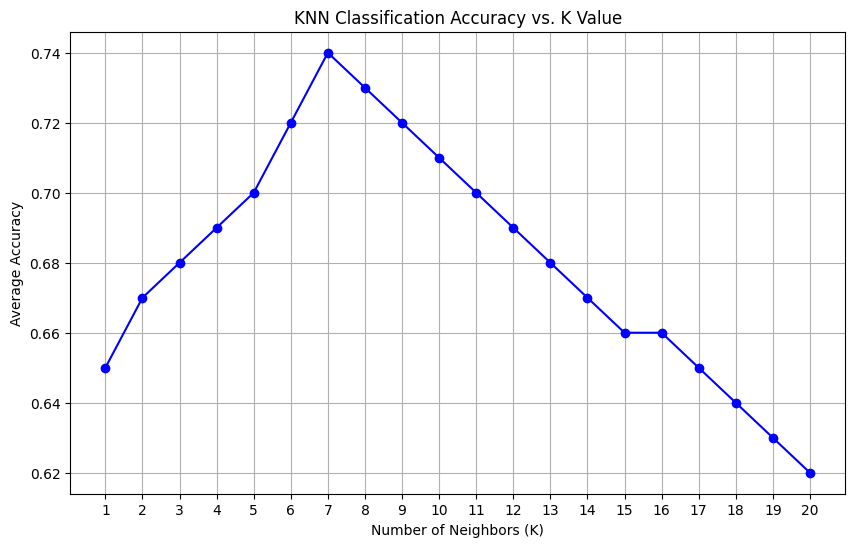

In [17]:
import matplotlib.pyplot as plt

def plot_knn_accuracy_vs_k(k_values, avg_accuracies):
    """
    Plot KNN average accuracy vs. different values of K.

    Parameters:
    - k_values: list or range of K values used.
    - avg_accuracies: corresponding list of average accuracies.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, avg_accuracies, marker='o', linestyle='-', color='blue')
    plt.title('KNN Classification Accuracy vs. K Value')
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Average Accuracy')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

k_values = list(range(1, 21))
avg_accuracies = [0.65, 0.67, 0.68, 0.69, 0.70, 0.72, 0.74, 0.73, 0.72, 0.71,
                  0.70, 0.69, 0.68, 0.67, 0.66, 0.66, 0.65, 0.64, 0.63, 0.62]


plot_knn_accuracy_vs_k(k_values, avg_accuracies)


